In [1]:
import numpy as np
import matplotlib.pyplot

class Perceptron:
    def __init__(self, input_dim, hidden_dim, output_dim, lr = 0.01):
        self.w1 = np.random.normal(0.0, pow(hidden_dim, -0.5), (input_dim, hidden_dim))
        self.w2 = np.random.normal(0.0, pow(hidden_dim, -0.5), (hidden_dim, output_dim))
        self.h = np.zeros((1, hidden_dim))
        self.lr = lr
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.theta = 0
        
    def softmax(self, x):
        e_x = np.exp(x-np.max(x))
        return e_x / e_x.sum(axis = 0) #only difference
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def feedforward(self, x):
        a = x.astype(float)
        b = self.w1.astype(float)
        self.h = self.sigmoid(np.dot(a,b) - self.theta)
        return self.sigmoid(np.dot(self.h, self.w2) - self.theta)
    
    def feedforward_upto_hidden(self, x):
        return self.sigmoid(np.dot(x, self.w1) - self.theta)
    
    def bprop_w2(self, g, y): #target, output
        q = (-2)*(g-y)*(y)*(1-y)
        return np.dot(self.h.reshape(self.hidden_dim, 1), q.reshape(1, self.output_dim))
    
    def bprop_w1(self, g, y, x): #target, output, input
        q1 = (-2)*(g-y)*(y)*(1-y)
        q2 = np.dot(self.w2, q1)
        return np.dot(x.reshape(self.input_dim, 1), q2*self.h*(1-self.h).reshape(1, self.hidden_dim))
    
    def training(self, input, target):
        x = np.array(input).T
        y = self.feedforward(x)
        g = np.array(target).T
        
        self.w2 = self.w2 - self.lr*self.bprop_w2(g, y)
        self.w1 = self.w1 - self.lr*self.bprop_w1(g, y, x)

In [2]:
#training 1
input_dim = 784
hidden_dim = 500
output_dim = 4
epoch = 20

pct = Perceptron(input_dim, hidden_dim, output_dim, 0.1)
training_dataset_file = open("ML_final_project_data_modifiedver_1.csv", 'r')
#training-dataset_file = open("mnist_train.csv", 'r')

training_dataset_list = training_dataset_file.readlines()
training_dataset_file.close()
input_list = list()

for k in range(epoch):
    print(k)
    pct.lr = pct.lr * 0.8 #learning rate decay
    for i in training_dataset_list:
        all_values = i.split(',')
        inputs = (np.asfarray(all_values[1:])/255.0*0.99) +0.01
        input_list.append(inputs)
        
        targets = np.zeros(output_dim) + 0.01
        targets[int(all_values[0])] = 0.99
        
        pct.training(inputs, targets)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [3]:
#Test
test_dataset_file = open("ML_final_project_data_modifiedver_1.csv", 'r')
#test_dataset_file = open("mnist_test.csv", 'r')

test_dataset_list = test_dataset_file.readlines()
test_dataset_file.close()
output_list = list()

Prediction fails. (target, prediction) =  3 1
Prediction =  [0.03029856 0.62084163 0.07177041 0.01258143]
Prediction fails. (target, prediction) =  1 2
Prediction =  [3.17764118e-04 1.10131963e-02 6.64871500e-01 5.93234424e-01]
Prediction fails. (target, prediction) =  1 3
Prediction =  [7.02968776e-05 4.35514695e-01 8.18209140e-02 5.49601433e-01]
Prediction fails. (target, prediction) =  1 3
Prediction =  [0.01097871 0.26515683 0.03501651 0.35210582]
Prediction fails. (target, prediction) =  2 1
Prediction =  [0.00106848 0.84707849 0.09945764 0.01467533]
Prediction fails. (target, prediction) =  1 0
Prediction =  [0.94117267 0.00138411 0.15031422 0.03521577]
Prediction fails. (target, prediction) =  3 1
Prediction =  [0.00749151 0.58193751 0.00834333 0.34729393]
Prediction fails. (target, prediction) =  2 1
Prediction =  [4.66031582e-04 6.60290886e-01 4.90296265e-01 5.51084341e-03]
Prediction fails. (target, prediction) =  0 3
Prediction =  [0.08994926 0.0010371  0.01725386 0.96779066

Prediction fails. (target, prediction) =  1 3
Prediction =  [2.91193711e-03 9.41697483e-04 3.40919772e-03 9.99518302e-01]
Prediction fails. (target, prediction) =  1 2
Prediction =  [3.58685889e-04 1.81482670e-01 6.86329007e-01 6.28064644e-02]
Prediction fails. (target, prediction) =  2 3
Prediction =  [0.00237521 0.00941959 0.18757607 0.81364858]
Prediction fails. (target, prediction) =  2 0
Prediction =  [0.43554565 0.0019902  0.3138248  0.10303919]
Prediction fails. (target, prediction) =  3 2
Prediction =  [0.01853932 0.13003646 0.20536195 0.05191673]
Prediction fails. (target, prediction) =  0 3
Prediction =  [0.29904162 0.01290592 0.02345793 0.44399014]
Prediction fails. (target, prediction) =  2 1
Prediction =  [0.01609899 0.35745573 0.25983415 0.00933588]
Prediction fails. (target, prediction) =  2 1
Prediction =  [2.88098752e-04 9.15967680e-01 2.96709589e-01 2.28803851e-03]
Prediction fails. (target, prediction) =  3 1
Prediction =  [0.00240931 0.73770503 0.04116222 0.07999068

Prediction fails. (target, prediction) =  3 1
Prediction =  [0.04368494 0.25559202 0.0718959  0.06660885]
Prediction fails. (target, prediction) =  0 3
Prediction =  [0.07828599 0.00268825 0.13795307 0.58977683]
Prediction fails. (target, prediction) =  3 0
Prediction =  [0.75719384 0.01926962 0.05217265 0.05084647]
Prediction fails. (target, prediction) =  3 0
Prediction =  [0.44512837 0.00969477 0.10842151 0.14890562]
Prediction fails. (target, prediction) =  2 0
Prediction =  [0.57710413 0.0265874  0.18710932 0.01379156]
Prediction fails. (target, prediction) =  2 1
Prediction =  [0.02034161 0.40761784 0.17257421 0.01118547]
Prediction fails. (target, prediction) =  3 0
Prediction =  [0.70976823 0.00241204 0.04588954 0.44729601]
Prediction fails. (target, prediction) =  1 2
Prediction =  [0.00102276 0.23787086 0.39370317 0.0894141 ]
Prediction fails. (target, prediction) =  0 3
Prediction =  [7.15403113e-04 2.72524351e-02 1.72456243e-02 9.85567793e-01]
Prediction fails. (target, pre

Prediction fails. (target, prediction) =  1 3
Prediction =  [0.08374651 0.09883107 0.06643351 0.1232572 ]
Prediction fails. (target, prediction) =  3 0
Prediction =  [0.32437113 0.02460815 0.03174674 0.28340377]
Prediction fails. (target, prediction) =  2 3
Prediction =  [0.05064844 0.00280975 0.14836093 0.72734129]
Prediction fails. (target, prediction) =  0 3
Prediction =  [0.21495495 0.00777735 0.05688794 0.54101861]
Prediction fails. (target, prediction) =  0 1
Prediction =  [0.00107061 0.81980214 0.24194265 0.00588858]
Prediction fails. (target, prediction) =  2 0
Prediction =  [0.6658375  0.00083793 0.47186294 0.04653438]
Prediction fails. (target, prediction) =  3 0
Prediction =  [0.55873244 0.00901382 0.01979163 0.51068124]
Prediction fails. (target, prediction) =  3 0
Prediction =  [0.84848793 0.00545748 0.01938087 0.31637065]
Prediction fails. (target, prediction) =  1 2
Prediction =  [0.0015709  0.18790017 0.26425957 0.16392466]
Prediction fails. (target, prediction) =  0 2


Prediction fails. (target, prediction) =  2 1
Prediction =  [1.46665578e-08 9.99996254e-01 1.79468291e-05 4.79071043e-01]
Prediction fails. (target, prediction) =  0 3
Prediction =  [0.01337723 0.03934889 0.01662176 0.88009195]
Prediction fails. (target, prediction) =  2 1
Prediction =  [0.00125568 0.58975524 0.49206042 0.00334029]
Prediction fails. (target, prediction) =  0 3
Prediction =  [0.00122691 0.00639081 0.02955365 0.9880495 ]
Prediction fails. (target, prediction) =  3 0
Prediction =  [0.31570012 0.01399662 0.28720786 0.0397027 ]
Prediction fails. (target, prediction) =  0 3
Prediction =  [0.10294976 0.00431116 0.01652803 0.95157079]
Prediction fails. (target, prediction) =  2 0
Prediction =  [0.22152396 0.17064981 0.14506673 0.00725609]
Prediction fails. (target, prediction) =  0 1
Prediction =  [0.28826022 0.45603745 0.04272992 0.00417224]
Prediction fails. (target, prediction) =  0 1
Prediction =  [0.03572577 0.46909374 0.08112384 0.01541922]
Prediction fails. (target, pre

Prediction fails. (target, prediction) =  2 1
Prediction =  [1.24941651e-04 9.83748099e-01 2.80766749e-01 8.59104309e-04]
Prediction fails. (target, prediction) =  1 3
Prediction =  [3.17706033e-04 1.93562999e-02 7.14719447e-02 9.65202888e-01]
Prediction fails. (target, prediction) =  2 1
Prediction =  [0.00336228 0.63750652 0.21298964 0.01287978]
Prediction fails. (target, prediction) =  0 1
Prediction =  [0.22410333 0.76575686 0.00857553 0.00894121]
Prediction fails. (target, prediction) =  2 0
Prediction =  [0.75288121 0.0015706  0.32842477 0.0453316 ]
Prediction fails. (target, prediction) =  3 1
Prediction =  [0.01836673 0.43147901 0.27452501 0.00491852]
Prediction fails. (target, prediction) =  1 0
Prediction =  [0.22150559 0.16597623 0.01189463 0.20820309]
Prediction fails. (target, prediction) =  1 2
Prediction =  [1.75949934e-02 2.29285472e-01 8.70093211e-01 1.22071239e-04]
Prediction fails. (target, prediction) =  3 2
Prediction =  [0.03495589 0.00795161 0.3153477  0.23483159

Prediction fails. (target, prediction) =  0 3
Prediction =  [3.15394336e-04 5.38557439e-02 8.32075321e-04 9.99076137e-01]
Prediction fails. (target, prediction) =  0 1
Prediction =  [0.00226949 0.54287889 0.17245429 0.03335292]
Prediction fails. (target, prediction) =  2 0
Prediction =  [0.94586657 0.0011425  0.1463018  0.04583499]
Prediction fails. (target, prediction) =  0 2
Prediction =  [0.03832637 0.02212555 0.22447132 0.19642504]
Prediction fails. (target, prediction) =  3 2
Prediction =  [8.96116496e-05 1.41078862e-02 7.47404675e-01 5.65988885e-01]
Prediction fails. (target, prediction) =  0 1
Prediction =  [1.41222055e-02 9.99064241e-01 1.50602481e-03 4.00932273e-04]
Prediction fails. (target, prediction) =  3 2
Prediction =  [0.02161814 0.00164278 0.86644744 0.06418233]
Prediction fails. (target, prediction) =  2 1
Prediction =  [0.10137481 0.41029338 0.08827637 0.00733918]
Prediction fails. (target, prediction) =  2 0
Prediction =  [0.44009146 0.00523027 0.05877604 0.43300815

Prediction fails. (target, prediction) =  0 2
Prediction =  [4.35723835e-01 1.20977312e-02 7.53954737e-01 7.48979631e-04]
Prediction fails. (target, prediction) =  0 3
Prediction =  [0.06591422 0.15736336 0.00581168 0.60233897]
Prediction fails. (target, prediction) =  3 1
Prediction =  [0.02959312 0.85323144 0.0153382  0.01573301]
Prediction fails. (target, prediction) =  2 1
Prediction =  [0.02630477 0.76095831 0.08044377 0.00468512]
Prediction fails. (target, prediction) =  3 1
Prediction =  [0.00061416 0.56054851 0.03147963 0.39604338]
Prediction fails. (target, prediction) =  0 3
Prediction =  [0.07743411 0.03645922 0.03035403 0.55369153]
Prediction fails. (target, prediction) =  2 3
Prediction =  [0.04381616 0.09778788 0.05156764 0.23247058]
Prediction fails. (target, prediction) =  0 2
Prediction =  [0.05050765 0.00989722 0.37490887 0.16622667]
Prediction fails. (target, prediction) =  2 0
Prediction =  [9.32719525e-01 7.87167731e-04 2.16180469e-01 3.07231153e-02]
Prediction fai

Prediction fails. (target, prediction) =  2 0
Prediction =  [0.24244295 0.11844102 0.08492234 0.02384358]
Prediction fails. (target, prediction) =  1 2
Prediction =  [0.00100505 0.46686987 0.72160243 0.0032813 ]
Prediction fails. (target, prediction) =  2 0
Prediction =  [0.44913969 0.01029531 0.20272229 0.05736855]
Prediction fails. (target, prediction) =  3 0
Prediction =  [9.69149898e-01 7.41110393e-04 3.43450525e-02 1.81044182e-01]
Prediction fails. (target, prediction) =  0 2
Prediction =  [0.00342641 0.01007339 0.93801704 0.01960423]
Prediction fails. (target, prediction) =  2 1
Prediction =  [0.04336905 0.35899505 0.09275512 0.02367485]
Prediction fails. (target, prediction) =  1 3
Prediction =  [0.11638883 0.39154006 0.00268641 0.3932573 ]
Prediction fails. (target, prediction) =  0 1
Prediction =  [0.01123682 0.88848713 0.01844347 0.02482253]
Prediction fails. (target, prediction) =  1 0
Prediction =  [8.97177279e-01 6.13802661e-01 3.93518564e-04 1.24486758e-01]
Prediction fai

Prediction fails. (target, prediction) =  0 3
Prediction =  [3.51944905e-01 4.32742071e-04 1.23612851e-01 6.49195413e-01]
Prediction fails. (target, prediction) =  3 0
Prediction =  [0.72648954 0.01045116 0.03538704 0.20668073]
Prediction fails. (target, prediction) =  2 3
Prediction =  [2.95815960e-02 1.17426382e-04 3.49274006e-01 8.64670592e-01]
Prediction fails. (target, prediction) =  0 1
Prediction =  [0.08366365 0.23433541 0.02342675 0.13572492]
Prediction fails. (target, prediction) =  0 1
Prediction =  [2.80224365e-01 9.80818015e-01 6.54321382e-03 9.39263812e-05]
Prediction fails. (target, prediction) =  3 0
Prediction =  [0.326844   0.02699136 0.04080703 0.27779056]
Prediction fails. (target, prediction) =  0 1
Prediction =  [0.04970117 0.18642793 0.10812345 0.0487759 ]
Prediction fails. (target, prediction) =  2 0
Prediction =  [6.15556078e-01 4.21705060e-04 4.56705275e-01 8.05705271e-02]
Prediction fails. (target, prediction) =  2 1
Prediction =  [0.082395   0.59317654 0.034

Prediction fails. (target, prediction) =  3 1
Prediction =  [0.0049613  0.47738567 0.11906076 0.04714533]
Prediction fails. (target, prediction) =  0 3
Prediction =  [0.09061524 0.08110232 0.03991851 0.25457349]
Prediction fails. (target, prediction) =  3 0
Prediction =  [0.22063192 0.12395078 0.08587256 0.0280741 ]
Prediction fails. (target, prediction) =  0 2
Prediction =  [0.2032868  0.04205439 0.22502143 0.01835901]
Prediction fails. (target, prediction) =  1 3
Prediction =  [0.13478675 0.01236661 0.10704009 0.31459188]
Prediction fails. (target, prediction) =  1 2
Prediction =  [0.00867962 0.15379818 0.36051613 0.03362104]
Prediction fails. (target, prediction) =  0 2
Prediction =  [0.11057764 0.00916272 0.26987463 0.17809904]
Prediction fails. (target, prediction) =  1 3
Prediction =  [0.03825424 0.00779842 0.03374509 0.88506366]
Prediction fails. (target, prediction) =  0 1
Prediction =  [0.0816107  0.76019816 0.01231879 0.01463957]
Prediction fails. (target, prediction) =  0 1


Prediction fails. (target, prediction) =  0 3
Prediction =  [0.44373523 0.00314117 0.0458905  0.52225395]
Prediction fails. (target, prediction) =  0 2
Prediction =  [0.15042395 0.01936969 0.23613147 0.08339309]
Prediction fails. (target, prediction) =  1 2
Prediction =  [0.24712213 0.01734563 0.36343165 0.02070624]
Prediction fails. (target, prediction) =  2 0
Prediction =  [0.50435186 0.00145998 0.30983701 0.09363957]
Prediction fails. (target, prediction) =  0 2
Prediction =  [0.02755174 0.22659493 0.2608665  0.01394008]
Prediction fails. (target, prediction) =  3 2
Prediction =  [0.18539336 0.07703197 0.39910053 0.00714102]
Prediction fails. (target, prediction) =  1 0
Prediction =  [0.97238427 0.01137108 0.01175268 0.04148348]
Prediction fails. (target, prediction) =  2 1
Prediction =  [0.01171053 0.51814705 0.22046016 0.00631221]
Prediction fails. (target, prediction) =  1 0
Prediction =  [0.95623357 0.02745602 0.00752715 0.0624604 ]
Prediction fails. (target, prediction) =  1 0


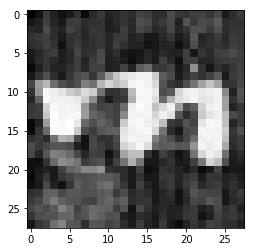

In [4]:
#test error rate
success = 0
failure = 0

for i in test_dataset_list:
    all_values = i.split(',')
    target = int(all_values[0])
    
    all_values_normalized = (np.asfarray(all_values[1:])/255*0.99) + 0.01
    prediction_list = pct.feedforward(np.asfarray(all_values_normalized))
    prediction = np.argmax(prediction_list)
    
    if target == prediction:
        success = success + 1
    else:
        failure = failure + 1
        print("Prediction fails. (target, prediction) = ", target, prediction)
        print("Prediction = ", prediction_list)
        im_array = np.asfarray(all_values_normalized).reshape((28,28))
        matplotlib.pyplot.imshow(im_array, cmap = 'Greys', interpolation = 'None')
        
print("Recognition error rate = ", (failure/(success + failure)))
print("success = ", success, ", failure = ", failure)

In [38]:
target_list = list()
for elm in test_dataset_list:
    target_list.append(int(elm[0]))

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_mldata
%matplotlib inline

X_train, y_train = input_list, target_list

pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X_train)

In [36]:
X_transformed[0][0]

5.146464212175328

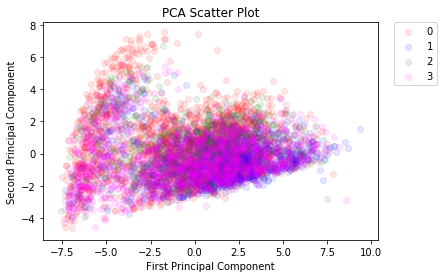

In [60]:
plt.figure()
colors = ['red', 'blue', 'lime', 'magenta']
target_name = ['0', '1', '2', '3']

red_x = list()
red_y = list()
blue_x = list()
blue_y = list()
lime_x = list()
lime_y = list()
mag_x = list()
mag_y = list()

for i in range(len(y_train)):
    if y_train[i] == 0:
        red_x.append(X_transformed[i][0])
        red_y.append(X_transformed[i][1])
    elif y_train[i] == 1:
        blue_x.append(X_transformed[i, 0])
        blue_y.append(X_transformed[i, 1])
    elif y_train[i] == 2:
        lime_x.append(X_transformed[i, 0])
        lime_y.append(X_transformed[i, 1])
    else:
        mag_x.append(X_transformed[i, 0])
        mag_y.append(X_transformed[i, 1])

plt.scatter(red_x, red_y, c = 'red', alpha = 0.1)
plt.scatter(blue_x, blue_y, c = 'blue', alpha = 0.1)
plt.scatter(lime_x, lime_y, c = 'green', alpha = 0.1)
plt.scatter(mag_x, mag_y, c = 'magenta', alpha = 0.1)

plt.legend(target_name, bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot" )
plt.show()

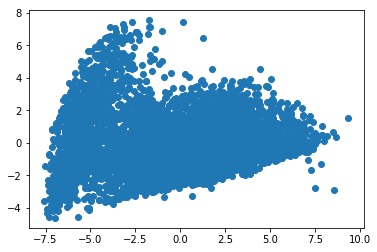

In [26]:
a = list()
b = list()
for i in range(len(y_train)):
    a.append(X_transformed[i,0])
    b.append(X_transformed[i,1])

plt.scatter(a,b)
plt.show()

In [ ]:
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [40]:
y_train

[1,
 3,
 2,
 3,
 3,
 2,
 1,
 0,
 0,
 2,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 2,
 1,
 3,
 1,
 1,
 3,
 3,
 2,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 3,
 0,
 1,
 3,
 3,
 0,
 3,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 3,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 3,
 0,
 3,
 2,
 2,
 3,
 0,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 0,
 0,
 0,
 3,
 3,
 1,
 0,
 3,
 3,
 3,
 1,
 3,
 0,
 0,
 2,
 3,
 2,
 2,
 0,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 0,
 2,
 3,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 0,
 2,
 1,
 3,
 0,
 1,
 3,
 3,
 3,
 0,
 0,
 1,
 3,
 1,
 0,
 3,
 3,
 1,
 3,
 2,
 2,
 1,
 1,
 3,
 1,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 3,
 3,
 3,
 3,
 0,
 2,
 0,
 3,
 0,
 1,
 3,
 3,
 3,
 0,
 0,
 2,
 3,
 0,
 1,
 1,
 3,
 1,
 0,
 3,
 3,
 1,
 3,
 3,
 0,
 0,
 2,
 3,
 3,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 0,
 1,
 3,
 0,
 0,
 2,
 3,
 2,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 1,
 1,
 0,
 0,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 0,
 1,
 3,
 2,
 1,
 1,
 2,
 0,
 1,


In [34]:
red_x

[]